# Stage II: Task 2: Member

In [42]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from numpy import random
from IPython.display import HTML, display
from scipy.stats.distributions import gamma
import statsmodels.api as sm
import plotly.express as px
import plotly
import plotly.graph_objs as go
from patsy import dmatrices
import plotly.tools as tls

%matplotlib inline


In [43]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

# Get dataset of states that was created in other notebook

In [44]:
# get state cases and deaths dataset from previous notebook 
# Dataset already normalized per 1 million population
MyStateCases  = pd.read_csv("Data/State_cases.csv").set_index('Date')
MyStateDeaths = pd.read_csv("Data/State_deaths.csv").set_index('Date')
Read = pd.read_csv("../../../data/output/covid.csv")
df = Read.drop(["countyFIPS","stateFIPS","Unnamed: 0"], axis=1)

In [45]:
MyStateCases = MyStateCases.fillna(0)
MyStateDeaths = MyStateDeaths.fillna(0)

print(MyStateCases.tail())
print(MyStateDeaths.tail())

                CA      FL      NC      NY      PA      TX
Date                                                      
10/17/20_x  1957.0  4029.0  2072.0  1784.0  1857.0  5079.0
10/18/20_x  1391.0  2528.0  2299.0  1390.0  1379.0  5790.0
10/19/20_x  4777.0  1696.0  1174.0   998.0   993.0  2556.0
10/20/20_x  4002.0  3652.0  1582.0  1201.0  1557.0  5067.0
10/21/20_x  3380.0  2227.0     0.0  2026.0  1425.0  5457.0
               CA     FL    NC    NY    PA     TX
Date                                             
10/17/20_y   34.0   90.0  17.0  12.0   9.0   81.0
10/18/20_y   36.0   49.0  11.0  15.0   0.0   30.0
10/19/20_y   22.0   53.0   5.0  17.0  34.0    8.0
10/20/20_y   37.0   86.0  53.0  10.0  33.0   65.0
10/21/20_y  165.0  105.0   0.0   5.0  29.0  114.0


In [9]:
MyStateCases.TX.describe()

count    274.000000
mean     107.094891
std      115.001569
min        0.000000
25%       13.250000
50%       58.000000
75%      175.000000
max      671.000000
Name: TX, dtype: float64

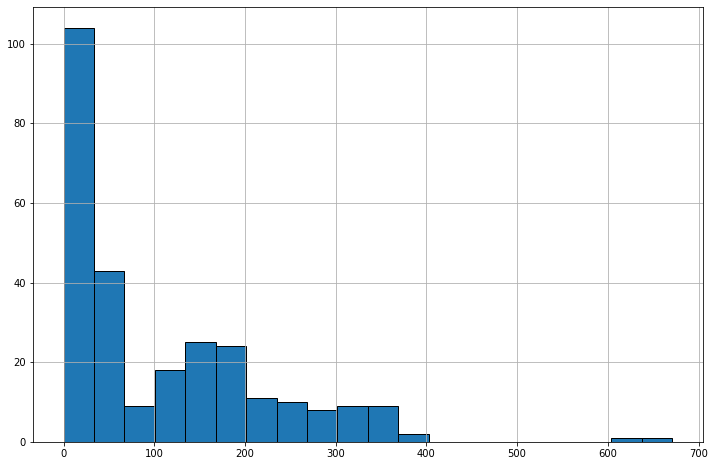

In [10]:
MyStateCases.TX.hist(bins=20, ec='black', figsize=(12,8))

## 1. Data is skewed, with longer tail to the right. 
## 2. Data is discrete

In [11]:
TexasCases = MyStateCases[['TX']]
TexasCases 


,TX
Date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-10-17,175.0
2020-10-18,200.0
2020-10-19,88.0


In [12]:
TexasCases_mean = TexasCases.mean().round(0)
TexasCases_mean 

TX    107.0
dtype: float64

In [13]:
TexasCases_var = TexasCases.var().round(0)
TexasCases_var

TX    13225.0
dtype: float64

In [14]:
MyStateCases_mean = MyStateCases.mean().round(0)
MyStateCases_mean

CA     82.0
FL    129.0
NC     87.0
NY     92.0
PA     53.0
TX    107.0
dtype: float64

In [15]:
MyStateCases_var = MyStateCases.var().round(0)
MyStateCases_var

CA     6447.0
FL    24591.0
NC     6560.0
NY    17341.0
PA     1459.0
TX    13225.0
dtype: float64

In [16]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size= 1000,  # Generate Poisson data
                                   mu=10)       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

col_0   2   3   4   5   6    7    8    9    10   11  12  13  14  15  16  17  \
row_0                                                                         
counts   3   4  13  42  65  106  116  122  129  120  83  71  52  36  15  12   

col_0   18  19  21  
row_0               
counts   7   3   1  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272054D2488>]],
      dtype=object)

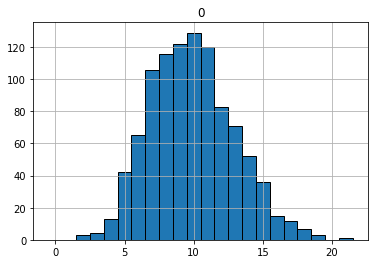

In [17]:
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1, ec='black')

In [18]:
TexasCases_PMF = TexasCases.assign(PMF= lambda x: stats.poisson.pmf(k = x['TX'], mu = TexasCases_mean))
TexasCases_PMF = TexasCases_PMF.sort_values(by = ['TX']).tail(20)
TexasCases_PMF



,TX,PMF
Date,,
2020-08-04,319.0,1.212073e-61
2020-07-30,325.0,1.616924e-64
2020-07-11,325.0,1.616924e-64
2020-08-01,326.0,5.307081e-65
2020-07-22,327.0,1.736568e-65
2020-07-10,330.0,5.973920e-67
2020-07-23,330.0,5.973920e-67
2020-07-09,338.0,6.550012e-71
2020-07-17,340.0,6.506255e-72


In [19]:
TX_Cas = TexasCases_PMF.as_matrix(columns = ['TX'])

TX_PMF = TexasCases_PMF.as_matrix(columns = ['PMF'])

print(TX_Cas)
print(TX_PMF)

[[319.]
 [325.]
 [325.]
 [326.]
 [327.]
 [330.]
 [330.]
 [338.]
 [340.]
 [340.]
 [341.]
 [344.]
 [346.]
 [346.]
 [351.]
 [362.]
 [380.]
 [391.]
 [618.]
 [671.]]
[[1.21207257e-061]
 [1.61692365e-064]
 [1.61692365e-064]
 [5.30708068e-065]
 [1.73656768e-065]
 [5.97391950e-067]
 [5.97391950e-067]
 [6.55001244e-071]
 [6.50625476e-072]
 [6.50625476e-072]
 [2.04155208e-072]
 [6.19773678e-074]
 [5.94436529e-075]
 [5.94436529e-075]
 [1.61033069e-077]
 [2.82470878e-083]
 [5.26484261e-093]
 [3.91117205e-099]
 [2.87166995e-251]
 [1.30402662e-292]]


C:\Users\harin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\harin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


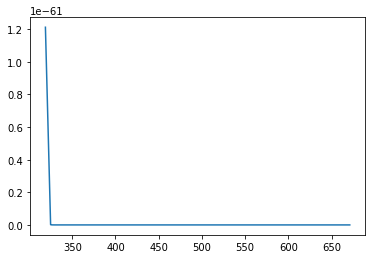

In [20]:
plt.plot(TX_Cas, TX_PMF)

# Model a poission distribution of COVID-19 Cases and Deaths of a state and 5 other states per 1 million population. 

In [21]:
MyStateCases

,CA,FL,NC,NY,PA,TX
Date,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-10-17,50.0,188.0,198.0,92.0,145.0,175.0
2020-10-18,35.0,118.0,219.0,71.0,108.0,200.0
2020-10-19,121.0,79.0,112.0,51.0,78.0,88.0


In [22]:
MyStateDeaths

,CA,FL,NC,NY,PA,TX
Date,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-10-17,1.0,4.0,2.0,1.0,1.0,3.0
2020-10-18,1.0,2.0,1.0,1.0,0.0,1.0
2020-10-19,1.0,2.0,0.0,1.0,3.0,0.0


# Model a poission distribution of COVID-19 Cases and Deaths for top 5 infected North Carolina counties per 200,000 population. 

### Identify top 5 infected counties of North Carolina. 

In [23]:
NC = df.loc[df['State']=='NC']
NC = NC.set_index('County Name')

#look for recent day to see total amount of cases and order the values to see counties with high case and death rates. 
NC

NC_cases = NC.filter(regex = "x")
NC_deaths = NC.filter(regex = "y").drop(["County Name_y"], axis=1)

In [24]:
#display last row which is the total cases 
LastRowCase = NC_cases.iloc[:,-1:]


#Have last row be renamed to total cases 
TotalCases = LastRowCase.rename(columns={list(LastRowCase)[0]: 'Total Cases'})


#print top 5 counties of cases in North Carolina
print(TotalCases.sort_values(by = ['Total Cases'], ascending = False).head(5))

#results will be our five counties that we will work with. 

                    Total Cases
County Name                    
Mecklenburg County        32038
Wake County               19952
Guilford County           10571
Durham County              8631
Forsyth County             8201


In [25]:
#Find population of the top 5 infected counties. 

array = ['Mecklenburg County','Wake County','Guilford County','Durham County', 'Forsyth County']

CountyPop = NC.loc[NC.index.isin(array)]


#get Population value of counties to use later on when normalizing. 
Mecklenburg_Pop = CountyPop.iloc[3][1]
Wake_Pop = CountyPop.iloc[4][1]
Guilford_Pop = CountyPop.iloc[2][1]
Durham_Pop = CountyPop.iloc[0][1]
Forsyth_Pop = CountyPop.iloc[1][1]


In [26]:
Counties_Cases = NC_cases.loc[NC_cases.index.isin(array)].T.rename_axis('Date')
Counties_Deaths = NC_deaths.loc[NC_deaths.index.isin(array)].T.rename_axis('Date')

#change date format for cases
NC_Counties_Cases  = Counties_Cases .T.rename(columns=lambda x: (pd.to_datetime(x.split('_')[0], errors= 'ignore')), errors='raise').T
print(NC_Counties_Cases.tail())

#change date format for deaths
NC_Counties_Deaths  = Counties_Deaths.T.rename(columns=lambda x: (pd.to_datetime(x.split('_')[0], errors= 'ignore')), errors='raise').T
print(NC_Counties_Deaths .tail())

County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-17            8508            8049            10357   
2020-10-18            8567            8131            10438   
2020-10-19            8590            8155            10514   
2020-10-20            8631            8201            10571   
2020-10-21            8631            8201            10571   

County Name  Mecklenburg County  Wake County  
Date                                          
2020-10-17                31442        19668  
2020-10-18                31688        19801  
2020-10-19                31820        19888  
2020-10-20                32038        19952  
2020-10-21                32038        19952  
County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-17              97             111              192   
2020-10-18              97             1

In [27]:
#Calculates differences of cases and deaths of each day (New Cases & New Deaths)
New_NC_Counties_Cases = NC_Counties_Cases.diff()
New_NC_Counties_Deaths = NC_Counties_Deaths.diff()

print(New_NC_Counties_Cases.tail())
print(New_NC_Counties_Deaths.tail())

County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-17            24.0            81.0             71.0   
2020-10-18            59.0            82.0             81.0   
2020-10-19            23.0            24.0             76.0   
2020-10-20            41.0            46.0             57.0   
2020-10-21             0.0             0.0              0.0   

County Name  Mecklenburg County  Wake County  
Date                                          
2020-10-17                163.0         85.0  
2020-10-18                246.0        133.0  
2020-10-19                132.0         87.0  
2020-10-20                218.0         64.0  
2020-10-21                  0.0          0.0  
County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-17             0.0             1.0              0.0   
2020-10-18             0.0             0

In [28]:
#calculate and Normalize dataset to cases per 200,000 people. 
norm_val = 200_000

#Normalize cases
Norm_MyNCCases = New_NC_Counties_Cases.assign(Durham_County = lambda x: (x['Durham County'] / Durham_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Forsyth_County = lambda x: (x['Forsyth County'] / Forsyth_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Guilford_County = lambda x: (x['Guilford County'] / Guilford_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(MeckenBurg_County = lambda x: (x['Mecklenburg County'] / Mecklenburg_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Wake_County = lambda x: (x['Wake County'] / Wake_Pop) * norm_val).round(0)


#Normalize deaths 
Norm_MyNCDeaths = New_NC_Counties_Deaths.assign(Durham_County = lambda x: (x['Durham County'] / Durham_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Forsyth_County = lambda x: (x['Forsyth County'] / Forsyth_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Guilford_County = lambda x: (x['Guilford County'] / Guilford_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(MeckenBurg_County = lambda x: (x['Mecklenburg County'] / Mecklenburg_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Wake_County = lambda x: (x['Wake County'] / Wake_Pop) * norm_val).round(0)

MyNCCases = Norm_MyNCCases.drop(['Durham County','Forsyth County','Guilford County','Mecklenburg County', 'Wake County'], axis=1)
MyNCDeaths = Norm_MyNCDeaths.drop(['Durham County','Forsyth County','Guilford County','Mecklenburg County', 'Wake County'], axis=1)

print(MyNCCases.tail())
print(MyNCDeaths.tail())  

County Name  Durham_County  Forsyth_County  Guilford_County  \
Date                                                          
2020-10-17            15.0            42.0             26.0   
2020-10-18            37.0            43.0             30.0   
2020-10-19            14.0            13.0             28.0   
2020-10-20            26.0            24.0             21.0   
2020-10-21             0.0             0.0              0.0   

County Name  MeckenBurg_County  Wake_County  
Date                                         
2020-10-17                29.0         15.0  
2020-10-18                44.0         24.0  
2020-10-19                24.0         16.0  
2020-10-20                39.0         12.0  
2020-10-21                 0.0          0.0  
County Name  Durham_County  Forsyth_County  Guilford_County  \
Date                                                          
2020-10-17             0.0             1.0              0.0   
2020-10-18             0.0             0.0     

# Perform Correlation between Enrichment data valuables and COVID-19 Cases

In [29]:
read = pd.read_csv("../../../data/output/COVID19_HOSBEDS_MERGE.csv")

In [30]:
df2 = read.drop(["countyFIPS","stateFIPS","Unnamed: 0"], axis=1)
df2 = df2.drop(df.loc[df['County Name'] == "Statewide Unallocated"].index)

In [31]:
Enrich_States = df2.groupby(['State']).sum()
Enrich_States.head()

,population,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,1/30/20_x,...,10/20/20_y,10/21/20_y,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
State,,,,,,,,,,,,,,,,,,,,,
AK,731545,0,0,0,0,0,0,0,0,0,...,67,68,1832.0,1532.0,193.0,193.0,76.0,8.963031,300.0,41.0
AL,4903185,0,0,0,0,0,0,0,0,0,...,2804,2828,18611.0,15138.0,1637.0,1637.0,569.0,52.147326,3473.0,383.0
AR,3017804,0,0,0,0,0,0,0,0,0,...,1727,1751,12729.0,10012.0,914.0,914.0,247.0,42.606742,2717.0,261.0
AZ,7278717,0,0,0,0,1,1,1,1,1,...,5837,5854,18345.0,15695.0,1882.0,1882.0,532.0,56.815879,2650.0,427.0
CA,39512223,0,0,0,0,2,3,3,4,4,...,17049,17214,83240.0,77808.0,8652.0,8652.0,3858.0,216.458434,5432.0,1986.0


In [32]:
MyVar = Enrich_States[['population','10/21/20_x','NUM_STAFFED_BEDS','NUM_ICU_BEDS','AVG_VENTILATOR_USAGE']]
MyVar_Cases = MyVar.rename(columns ={"10/21/20_x" : "Cases"})
MyVar_Cases.head()

,population,Cases,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
State,,,,,
AK,731545,11599,1532.0,193.0,41.0
AL,4903185,175674,15138.0,1637.0,383.0
AR,3017804,99597,10012.0,914.0,261.0
AZ,7278717,233912,15695.0,1882.0,427.0
CA,39512223,886954,77808.0,8652.0,1986.0


In [33]:
Value = 500_000
Norm_Enrich = pd.DataFrame()

Norm_Enrich['Cases'] = ((MyVar_Cases['Cases'] / MyVar_Cases['population']) * Value).round(0)
Norm_Enrich['NUM_STAFFED_BEDS'] = ((MyVar_Cases['NUM_STAFFED_BEDS'] / MyVar_Cases['population']) * Value).round(0)
Norm_Enrich['NUM_ICU_BEDS'] = ((MyVar_Cases['NUM_ICU_BEDS'] / MyVar_Cases['population']) * Value).round(0)
Norm_Enrich['AVG_VENTILATOR_USAGE'] = ((MyVar_Cases['AVG_VENTILATOR_USAGE'] / MyVar_Cases['population']) * Value).round(0)




Norm_Enrich.head()

,Cases,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
State,,,,
AK,7928.0,1047.0,132.0,28.0
AL,17914.0,1544.0,167.0,39.0
AR,16502.0,1659.0,151.0,43.0
AZ,16068.0,1078.0,129.0,29.0
CA,11224.0,985.0,109.0,25.0


## Does higher number of staffed beds lead to higher covid case numbers?

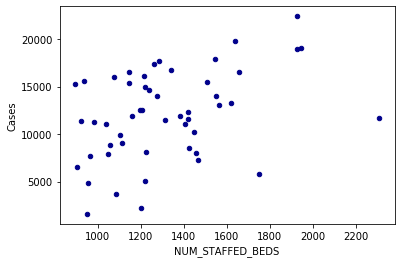

In [34]:
Staffed_Beds_Plot = Norm_Enrich.plot.scatter(x = 'NUM_STAFFED_BEDS',y ='Cases',c ='DarkBlue')

## Does higher number of ICU beds lead to higher covid case numbers?

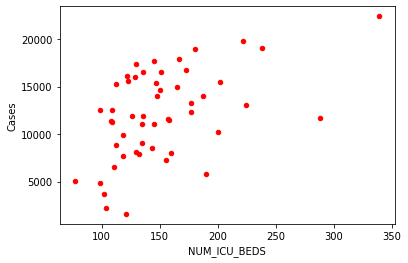

In [47]:
ICUBeds_Plot = Norm_Enrich.plot.scatter(x = 'NUM_ICU_BEDS',y ='Cases',c ='Red')

## Does higher number of average ventilator usage lead to higher covid case numbers?

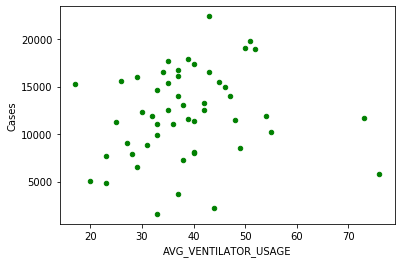

In [46]:
Vent_Plot = Norm_Enrich.plot.scatter(x = 'AVG_VENTILATOR_USAGE',y ='Cases',c ='Green')
Vent_Plot

### Correlation between cases and enrichment variables. 

In [40]:
Norm_Enrich.corr()[0:1]

,Cases,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
Cases,1.0,0.400107,0.502448,0.132817


# Analysis:
## Cases and Number of ICU Beds have a high correlation between each other

In [49]:
#Vent_Plot.write_image("images/VentilatorUsage_Correlation.png")